## Introducción a las Series Univariadas
Vamos a cargar los datos de las series de las tasas de interés. Los datos están tomados desde el 5 de enero de 1962, hasta el 10 de abril de 2009, para un total de 2467 observacione, con una periodicidad semanal.

In [1]:
r1=read.table("/Users/sergiocalderon/Documents/GitHub/TimeSeries/Bases de Datos/w-gs1yr.txt",header=T)[,4] 

r3=read.table("/Users/sergiocalderon/Documents/GitHub/TimeSeries/Bases de Datos/w-gs3yr.txt",header=T)[,4]
head(r1)
head(r3)

[1] 3.24 3.32 3.29 3.26 3.29 3.29

[1] 3.70 3.75 3.80 3.77 3.80 3.76

# Gráficas de las Series de Tiempo

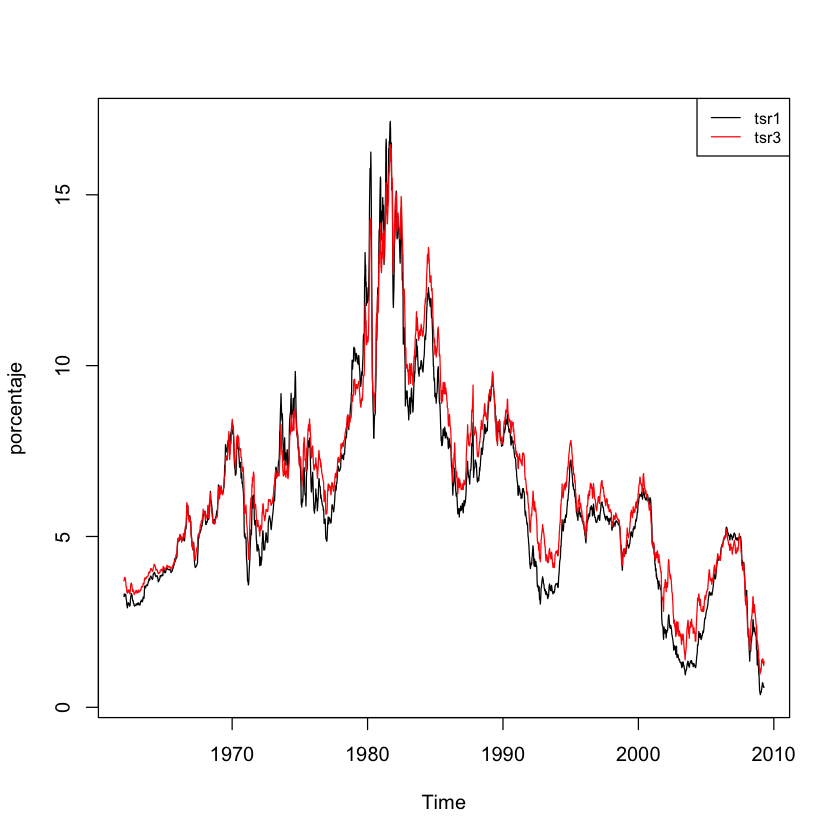

In [2]:
tsr1=ts(r1,start=1962+5/365.25,frequency=365.25/7)
tsr3=ts(r3,start=1962+5/365.25,frequency=365.25/7)
ts.plot(tsr1,tsr3, gpars = list(col = c("black", "red")),ylab="porcentaje")
legend("topright", legend=c("tsr1", "tsr3"),
       col=c("black", "red"), lty=1, cex=0.8)

# Diagramas de Dispersión

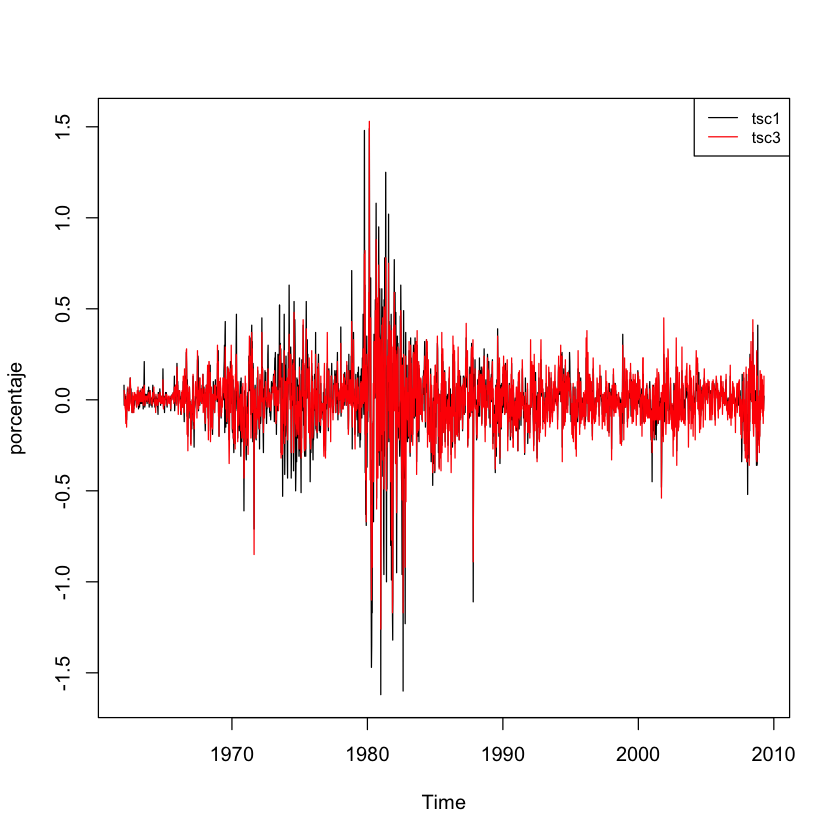

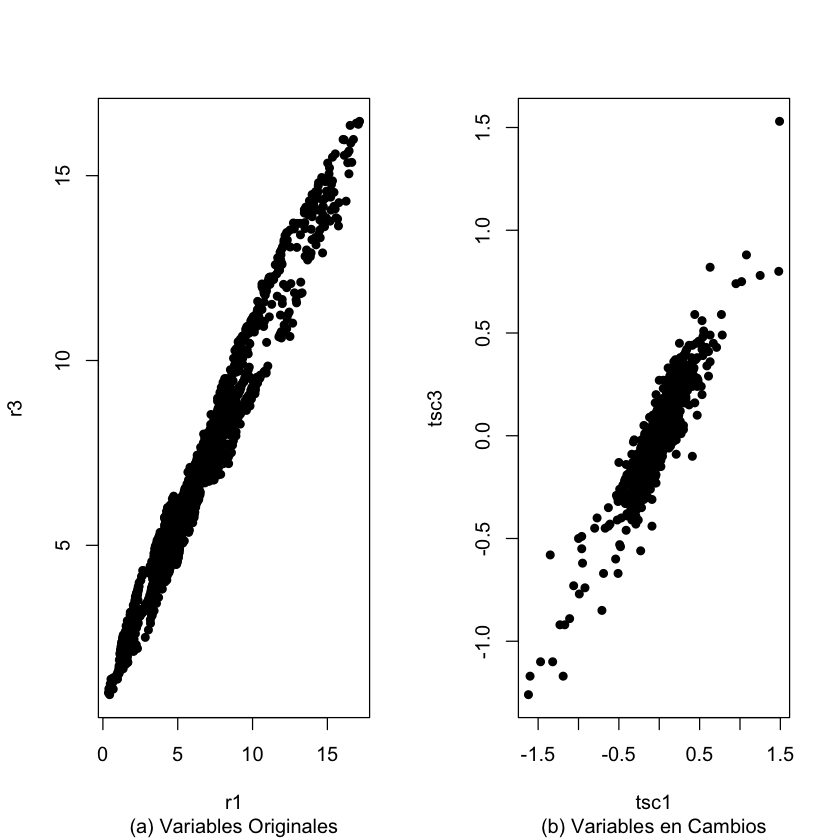

In [3]:
tsc1=diff(tsr1)
tsc3=diff(tsr3)
ts.plot(tsc1,tsc3, gpars = list(col = c("black", "red")),ylab="porcentaje")
legend("topright", legend=c("tsc1", "tsc3"),
       col=c("black", "red"), lty=1, cex=0.8)

par(mfrow=c(1,2))
plot(r1,r3,type='p',pch=16,sub = "(a) Variables Originales")
plot(tsc1,tsc3,type='p',pch=16,sub="(b) Variables en Cambios")

Primer ajuste de regresión para las series originales asumiendo que los ruidos son IID, es decir vamos a ajustar el modelo
$$r_{3t}=\alpha+\beta r_{1t}+e_t$$


Call:
lm(formula = r3 ~ r1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.82319 -0.37691 -0.01462  0.38661  1.35679 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.83214    0.02417   34.43   <2e-16 ***
r1           0.92955    0.00357  260.40   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5228 on 2465 degrees of freedom
Multiple R-squared:  0.9649,	Adjusted R-squared:  0.9649 
F-statistic: 6.781e+04 on 1 and 2465 DF,  p-value: < 2.2e-16


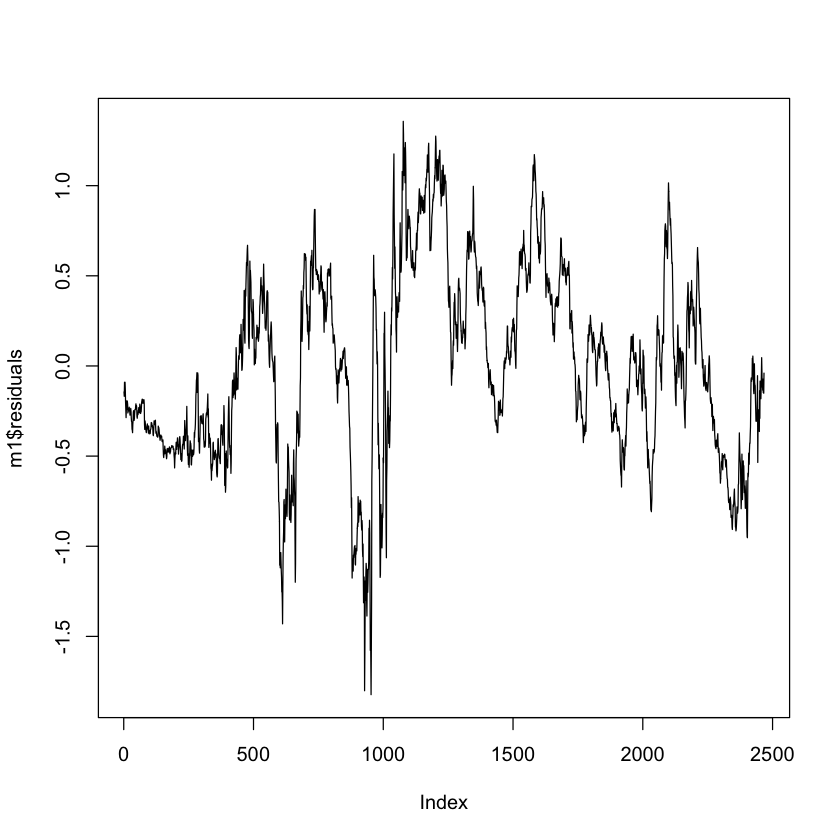

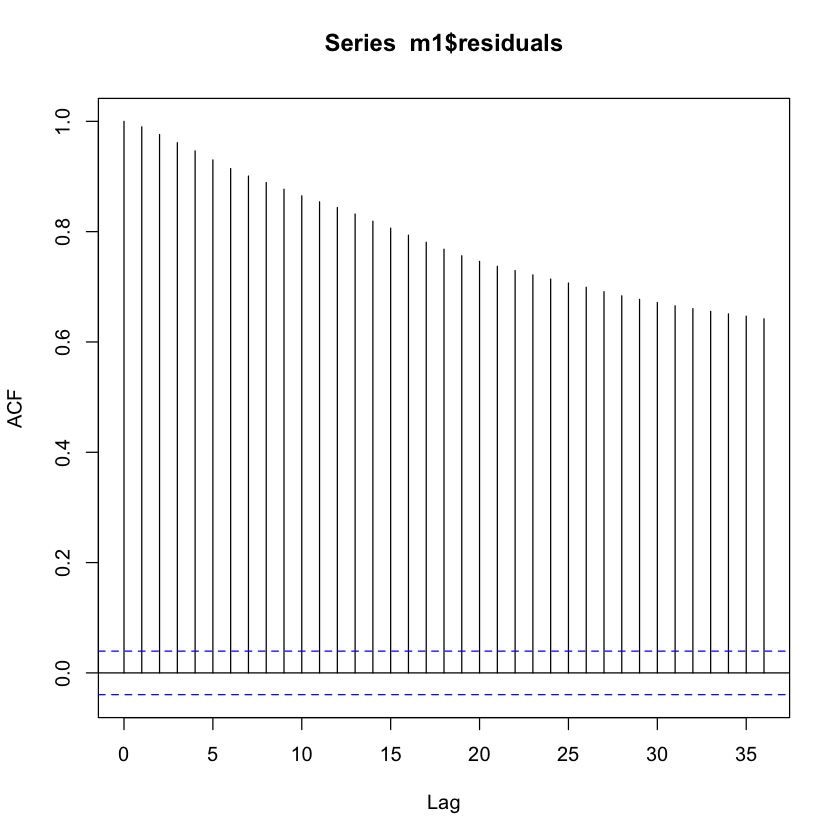

In [4]:
m1=lm(r3~r1)
summary(m1)
###Residuales del modelo
plot(m1$residuals,type='l')
acf(m1$residuals,lag=36)

Note que en el ajuste del modelo, las pruebas sobre los parámetros resultan  significativas, es decir son diferentes de cero. Vale la pena notar también que los residuales del modelo paracen no ser IID, en el sentido que no todos presentan la misma distribución, por ejemplo, la media de las observaciones antes del tiempo t=1000 parace ser muy distinta a la medias después del tiempo t=1000. Adicionalmente, al ver la estructural de autocorrelación temporal, podemos ver que los residuales resultan altamente autocorrelacionados violando el supuesto de independencia. En términos de econometría, lo que quiere decir esto es que las dos variables no están cointegradas, es decir, no hay una relación de equilibrio a largo plazo(estacionaria) entre las dos variables. 

Vesmos ahora el ajuste de los cambios de las tasas.


Call:
arima(x = tsc3, order = c(0, 0, 1), xreg = tsc1, include.mean = F)

Coefficients:
         ma1    tsc1
      0.1823  0.7936
s.e.  0.0196  0.0075

sigma^2 estimated as 0.0046:  log likelihood = 3136.62,  aic = -6267.23

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric





z test of coefficients:

      Estimate Std. Error  z value  Pr(>|z|)    
ma1  0.1823359  0.0195882   9.3084 < 2.2e-16 ***
tsc1 0.7935840  0.0075461 105.1652 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


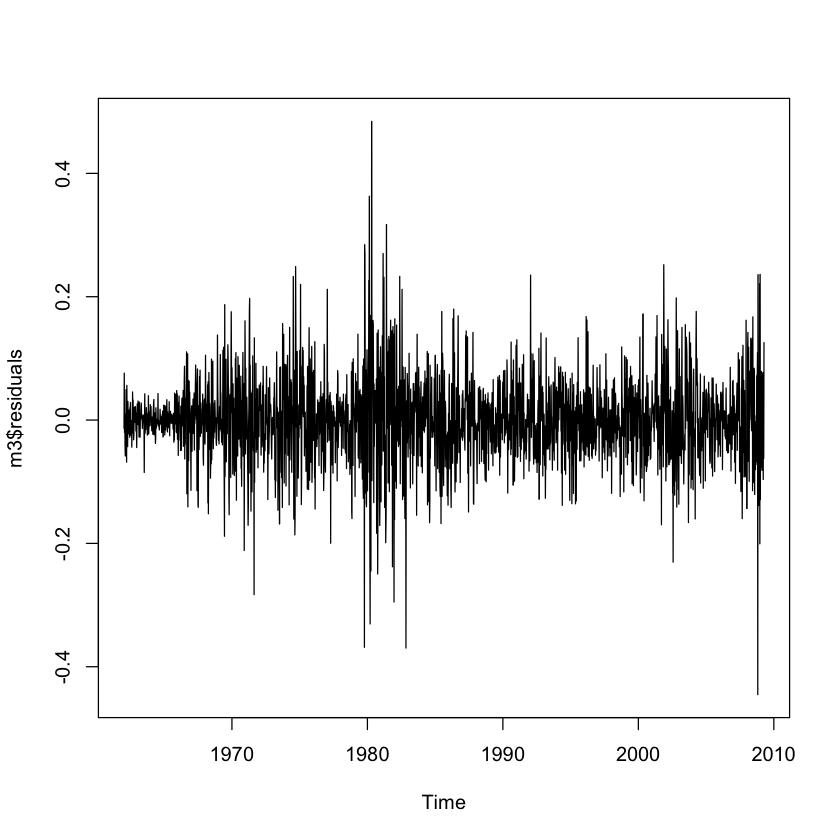

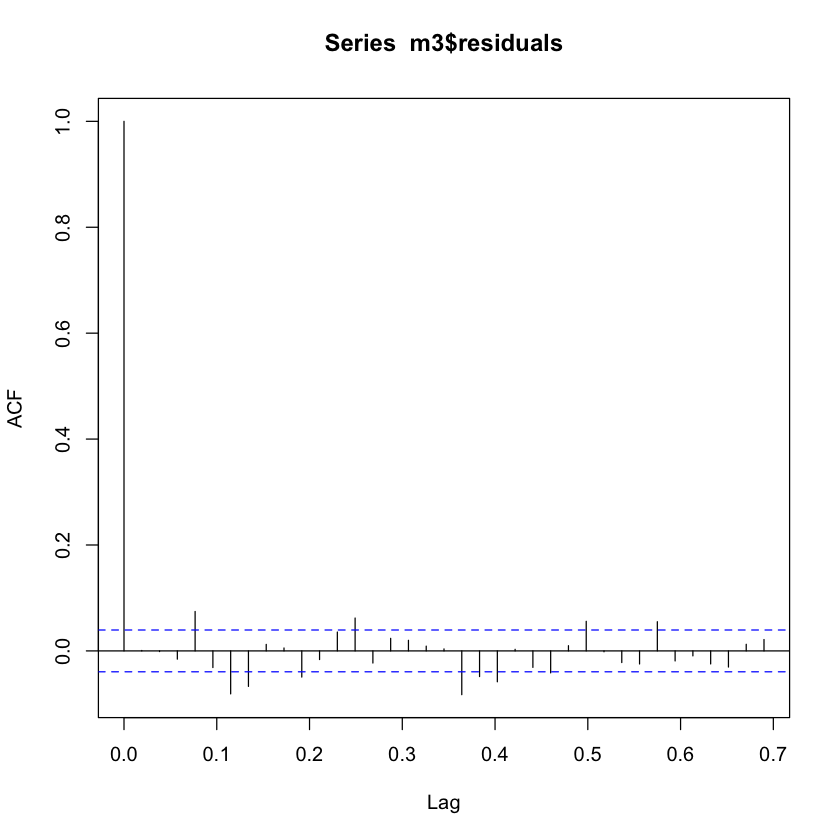

In [6]:
m3=arima(tsc3,order=c(0,0,1),xreg=tsc1,include.mean=F)
m3
library(lmtest)
coeftest(m3)

plot(m3$residuals)
acf(m3$residuals,lag.max = 36)

Note que ahora los residuales son prácticamente no autcorrelacionados. Vale la pena decir que aún hay una característica que sigue presente y es la heterocedasticidad condicional, la cual estudiaremos mas adelante.